In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cv19gm.models.seir_meta import SEIRMETA
import cv19gm.utils.cv19mobility as cv19mob
import time

# Meta-population SEIR model with 3 regions

## Build flux function

In [2]:
population = np.array([100000,200000,150000])
Phi, Phi_T = cv19mob.rnd_flux(population=population,fraction=0.1,transposed=True)

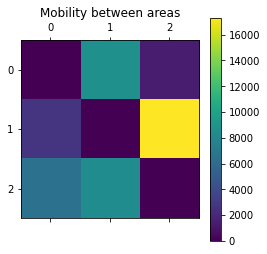

In [3]:
plt.matshow(Phi(0))
plt.title('Mobility between areas')
plt.colorbar()
plt.show()

In [4]:
beta = np.array([0.2,0.15,0.11])
mu = np.array([1,0.8,1.2])


I = np.array([1000,0,1500])
I_d = np.array([100,0,150])
R = np.array([5000,10000,7500])
I_ac = np.array([4500,9000,6500])

rR_S = 0

#E = False
#E_d = False
popfraction = 1  # np.array([1,1,1])

In [5]:
cfg = 'cfg/SEIRMETA.toml'

In [6]:
NMethods = 6

In [12]:
# Create similar models using different instantiation of the Phi matrices using the "method" parameter
model = []
for i in range(NMethods):
    model.append(SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,Phi_T = Phi_T, rR_S=rR_S,t_end=500, method = i, seed = 0))

In [13]:
for sim in model:
    init = time.time()
    sim.solve(method="RK45")
    end = time.time()
    print("Method "+str(sim.method)+" took "+str(end-init)+" seconds to complete")

Method 0 took 18.948848962783813 seconds to complete
Method 1 took 15.117360353469849 seconds to complete
Method 2 took 14.722559690475464 seconds to complete
Method 3 took 14.24687933921814 seconds to complete
Method 4 took 13.71450686454773 seconds to complete
Method 5 took 1.0979666709899902 seconds to complete


## Results comparison

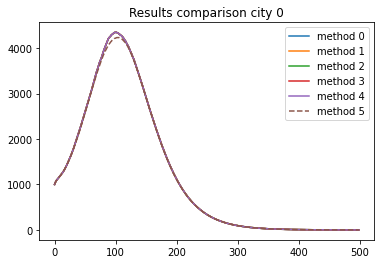

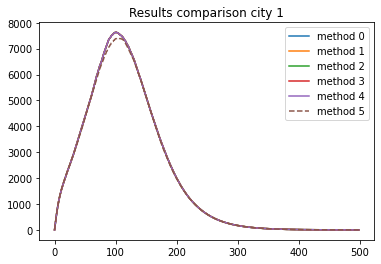

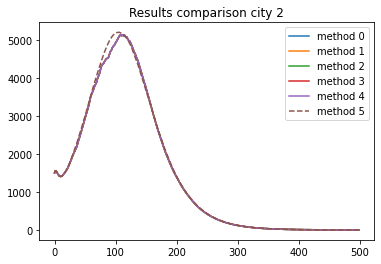

In [14]:
for j in range(len(population)):
    for sim in model:
        if sim.method==5:
            plt.plot(sim.t,sim.I[j],label="method "+str(sim.method), linestyle="--")
        else:
            plt.plot(sim.t,sim.I[j],label="method "+str(sim.method))
    plt.legend(loc=0)
    plt.title("Results comparison city "+str(j))
    plt.show()